In [1]:
"""
Move nan analysis to EDA?

FROM EDA
1. Packages
All the packages we'll need for the various algorithms we can use
"""

# Global imports
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline

np.random.seed(0)
pd.__version__

'0.22.0'

In [2]:
# FROM EDA 2.4 Load ALL data
train_all = pd.read_csv('../Data/subsetted/train_all.csv', sep=',', engine='python')

# Load all training data
train_data_all = pd.read_csv('..\Data\subsetted\subsetted_training_data_all.csv', sep=',', engine='python')
print('Subsetted data done')

Subsetted data done


In [24]:
# FROM EDA 3. Check the data

# 3.1 Data shape
# Check the shape of the train data
print("Train data shape:", train_all.shape, "Subsetted train data shape:", train_data_all.shape)

# 3.2 Descriptive stats of train data
# Descriptive statistics of train data
train_data_all.describe()

Train data shape: (167888, 3) Subsetted train data shape: (167888, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,1.678880e+05,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,1272.0,...,165.000000,166828.000000,38169.000000,1.673590e+05,1.678520e+05,167854.000000,1.678510e+05,167843.000000,4683.000000,1.670020e+05
mean,1.299536e+07,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,66.0,...,271.260606,1968.569311,1.437764,1.843460e+05,4.726833e+05,2015.462181,2.888805e+05,5989.515575,13.827247,6.049390e+13
std,3.016071e+06,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,0.0,...,293.611447,23.777202,0.544508,2.192841e+05,6.028372e+05,0.498569,4.456451e+05,7214.731946,2.421658,1.054137e+12
min,1.071174e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,...,12.000000,1824.000000,1.000000,4.400000e+01,2.200000e+01,2015.000000,2.200000e+01,19.920000,3.000000,6.037101e+13
25%,1.154899e+07,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,66.0,...,88.000000,1953.000000,1.000000,8.256800e+04,2.026522e+05,2015.000000,8.373000e+04,2798.070000,13.000000,6.037312e+13
50%,1.254060e+07,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,...,160.000000,1970.000000,1.000000,1.340510e+05,3.500000e+05,2015.000000,1.977760e+05,4501.040000,14.000000,6.037604e+13
75%,1.421930e+07,1.000000,7.000000,819.000000,3.000000,4.000000,4.000000,7.000000,3.000000,66.0,...,320.000000,1987.000000,2.000000,2.142570e+05,5.540020e+05,2016.000000,3.553340e+05,6914.165000,15.000000,6.059042e+13
max,1.676893e+08,13.000000,21.000000,3560.000000,20.000000,16.000000,4.000000,12.000000,20.000000,66.0,...,1366.000000,2016.000000,6.000000,1.142179e+07,4.906124e+07,2016.000000,4.895220e+07,586639.300000,99.000000,4.830301e+14


In [ ]:
# FROM EDA 3.3 Variables types
# Print the type of each variable

print("ALL DATA TYPES")
print(train_data_all.dtypes)

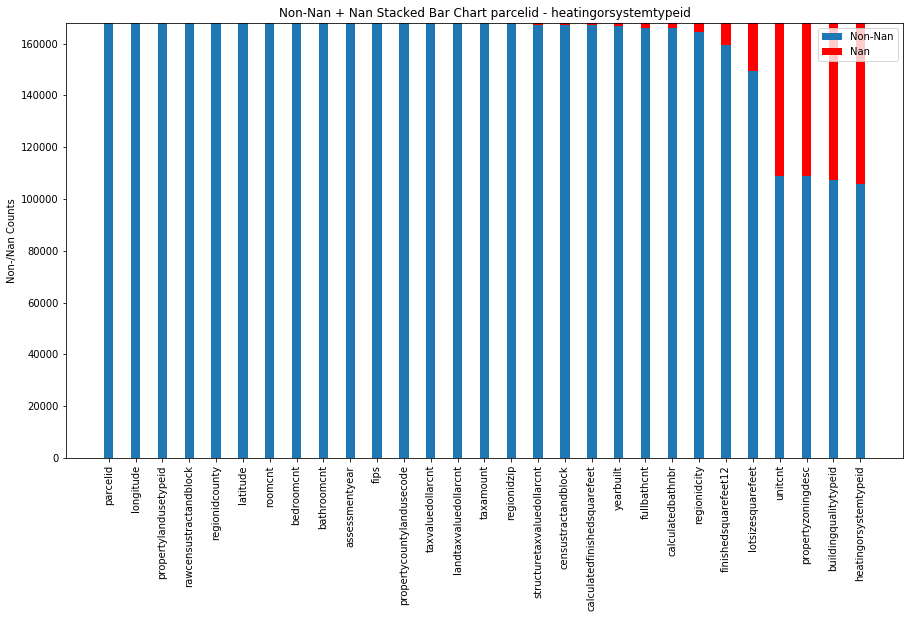

In [3]:
# Null Counts

# Count the number of nan and non-nan in each feature column
nan_counts = train_data_all.isnull().sum()
non_nan_counts = train_data_all.notna().sum()

# Create a dataframe of the non/nan counts
counts = pd.concat([non_nan_counts, nan_counts], axis=1, join='inner')
counts.columns = ['non_nan', 'nan']
counts = counts.sort_values(by=['nan'])

# Split the data in 2 for easier viewing
N = counts.shape[0]
n2 = int(N/2)

# Set the width of the bars
width = .35       # the width of the bars: can also be len(x) sequence

# Create a figure for the graph
fig, ax = plt.subplots(figsize=(15,8))
ind = np.arange(1, N+1)

# Create bar charts for non-nan and nan 
non_nan_bar = ax.bar(ind[:n2], counts.non_nan[:n2], width)
nan_bar = ax.bar(ind[:n2], counts.nan[:n2], width,  color='r', bottom=counts.non_nan[:n2])

# Set the ticks to the index and update the labels
ax.set_xticks(ind[:n2])
ax.set_xticklabels(counts.index.values[:n2], rotation='vertical')

# Set the ylabel and plot name
ax.set_ylabel('Non-/Nan Counts')
ax.set_title('Non-Nan + Nan Stacked Bar Chart %s - %s' %(counts.index.values[0], counts.index.values[n2-1]))

# Add a legend
ax.legend((non_nan_bar[0], nan_bar[0]), ('Non-Nan', 'Nan'))

# Show plot
plt.show()

In [25]:
# Descriptives for above features

# Split the features for what's shown in the graph above
rows = counts.index.values[:n2]
cols = ['Nan', 'Non-Nan', '% Nan'] # The columns we'll be printing, but we don't use this var

# Print values
for r in rows:
    print("%s: " %r)
    print("Nan: %i | Non-Nan: %i | %% Nan: %.2f%%" %(counts.nan[r], counts.non_nan[r], (counts.nan[r]/(counts.nan[r] + counts.non_nan[r])*100)))
    print(train_data_all[r].describe(), '\n') # describe variables so we can see a sample of the data

parcelid: 
Nan: 0 | Non-Nan: 167888 | % Nan: 0.00%
count    1.678880e+05
mean     1.299536e+07
std      3.016071e+06
min      1.071174e+07
25%      1.154899e+07
50%      1.254060e+07
75%      1.421930e+07
max      1.676893e+08
Name: parcelid, dtype: float64 

longitude: 
Nan: 34 | Non-Nan: 167854 | % Nan: 0.02%
count    1.678540e+05
mean    -1.182011e+08
std      3.600586e+05
min     -1.194754e+08
25%     -1.184130e+08
50%     -1.181769e+08
75%     -1.179247e+08
max     -1.175546e+08
Name: longitude, dtype: float64 

propertylandusetypeid: 
Nan: 34 | Non-Nan: 167854 | % Nan: 0.02%
count    167854.000000
mean        261.828619
std           5.163838
min          31.000000
25%         261.000000
50%         261.000000
75%         266.000000
max         275.000000
Name: propertylandusetypeid, dtype: float64 

rawcensustractandblock: 
Nan: 34 | Non-Nan: 167854 | % Nan: 0.02%
count    1.678540e+05
mean     6.049154e+07
std      2.054437e+05
min      6.037101e+07
25%      6.037312e+07
50%   

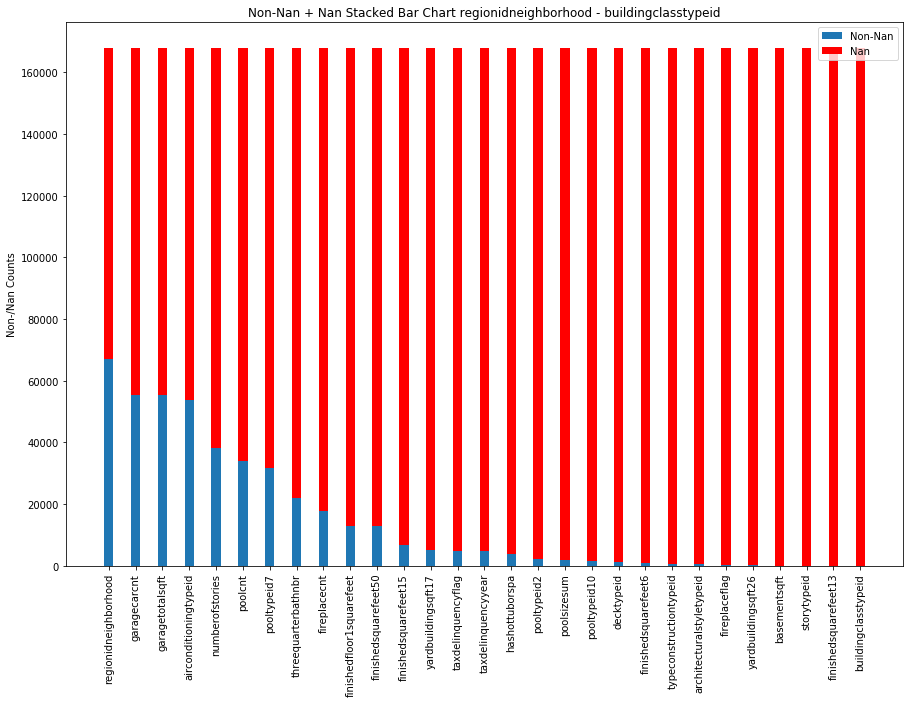

In [8]:
# Create a figure for the graph
fig, ax = plt.subplots(figsize=(15,10))
ind = np.arange(1, N+1)

# Set width of bars
width = .35       # the width of the bars: can also be len(x) sequence

# Create bar charts for non-nan and nan 
non_nan_bar = ax.bar(ind[n2:], counts.non_nan[n2:], width)
nan_bar = ax.bar(ind[n2:], counts.nan[n2:], width,  color='r', bottom=counts.non_nan[n2:])

# Set the ticks to the index and update the labels
ax.set_xticks(ind[n2:])
ax.set_xticklabels(counts.index.values[n2:], rotation='vertical')

# Set the ylabel and plot name
ax.set_ylabel('Non-/Nan Counts')
ax.set_title('Non-Nan + Nan Stacked Bar Chart %s - %s' %(counts.index.values[n2], counts.index.values[N-1]))

# Add a legend
ax.legend((non_nan_bar[0], nan_bar[0]), ('Non-Nan', 'Nan'))

# Show the plot
plt.show()

In [26]:
# Descriptives for above features

# Split the features for what's shown in the graph above
rows = counts.index.values[n2:]
cols = ['Nan', 'Non-Nan', '% Nan'] # The columns we'll be printing, but we don't use this var

# Print values
for r in rows:
    print("%s: " %r)
    print("Nan: %i | Non-Nan: %i | %% Nan: %.2f%%" %(counts.nan[r], counts.non_nan[r], (counts.nan[r]/(counts.nan[r] + counts.non_nan[r])*100)))
    print(train_data_all[r].describe(), '\n') # describe variables so we can see a sample of the data

regionidneighborhood: 
Nan: 100902 | Non-Nan: 66986 | % Nan: 60.10%
count     66986.000000
mean     189295.685382
std      165687.734522
min        6952.000000
25%       46736.000000
50%      118872.000000
75%      274765.000000
max      764167.000000
Name: regionidneighborhood, dtype: float64 

garagecarcnt: 
Nan: 112431 | Non-Nan: 55457 | % Nan: 66.97%
count    55457.000000
mean         1.813513
std          0.599447
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         24.000000
Name: garagecarcnt, dtype: float64 

garagetotalsqft: 
Nan: 112431 | Non-Nan: 55457 | % Nan: 66.97%
count    55457.000000
mean       347.603909
std        264.565618
min          0.000000
25%          0.000000
50%        434.000000
75%        488.000000
max       7339.000000
Name: garagetotalsqft, dtype: float64 

airconditioningtypeid: 
Nan: 114100 | Non-Nan: 53788 | % Nan: 67.96%
count    53788.000000
mean         1.814345
std          2.970239
min          1.0

# Thoughts

So there are two big leaps, one from 10% to 35% and one from 36% to 60%. 

We could replace the Nans with some other value (-9). The fact that the data is missing in these places may give us important information. For some of the counts and sqft we could recode to 0 - some features are (if any) and don't have 0's, so we could probably just assume that means the property doesn't have that feature.

Some features are will likely be strongly correlated (like roomcnt and sqft, or the fullbathcnt/threqtrsbathcnt and bathroomcnt) - Do we want to examine the correlations and remove one or the other?

## Features with least Nan
- longitude 34 Nan
- latitude 34
- propertytaxlandusetypeid 34
- rawcensustractandblock 34
- regionidcounty 34
- roomcnt 34
- bedroomcnt 34
- bathroomcnt 34
- assessmentyear 34
- fips 34
- propertylandusecode 35
- taxvaluedollarcnt 36
- taxamount 45
- regionzip 119

Remaining have 35% or more missing

Removing all of the above Nans would save us some headache and we wouldn't lose that much data

## Features to Remove
- fireplaceflag
    - Information should be accounted for in fireplacecnt (17896 non-nan), especially if we recode Nan->0
    - also has only 394 non-nan values? which doesn't make a lot of sense with the fireplacecnt above
- Probably some of the square feet measures, there are just so many (did we go over something to determine which variable has the greatest impact in a group of similar/highly correlated in 203? I feel like it was related to linear regression)
    - finishedfloor1squareft, calculatedfinishedsquarefeet, finishedsquarefeet6, etc
- Same as above for pool measures
    - pooltypeidip10, pooltypeid2, hashotuborspa, etc
- Maybe propertyzoningdesc
- Probably only use one of: rawcensustractandblock, censustractandblock
    
## Feature to Recode
- airconditioningtypeid and heatingorsystemtypeid both have coded values for None, so we could recode Nan -> -9

# Impute the data

I included enough rows in the mini data so that no entire column would be nan. We should consider which cols not to use with this. Probably nothing with less than 60% non-nan. We can create some dummy variables - listed pool/not listed pool to make up for some of the data lost in the other cols

In [24]:
# Packages
from sklearn import preprocessing

# Remove non int or float objs
train_data = train_data_all.select_dtypes(['float64','int64'])

# Subset the data to be big enough so that no cols are all NaN
mini_data = train_data[:10000]
mini_labels = train_all[:10000]

# View column names
print(list(mini_data))

# Replace all NaN objects with 'NaN' as per sklearn documentation says
mini_data = mini_data.replace(np.nan, 'NaN')

# Create and fit the imputer, transform the data
imputer = preprocessing.Imputer()
encoded = imputer.fit_transform(mini_data)

# Check shapes
print(pd.DataFrame(mini_data).shape)
ready = pd.DataFrame(encoded, columns=list(mini_data))

# Print the imputed df
print(ready)

['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'taxdelinquencyye